In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r"D:\Ultimate Programming\Data Bases\Machine Learning Datasets\Property Price Prediction.xlsx")
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500


In [3]:
print(df.isnull().sum().sum())

207


In [4]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [5]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)

In [6]:
print(df.isnull().sum().sum())

0


In [7]:
print(df.duplicated().sum().sum())

0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 1.4 MB


In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


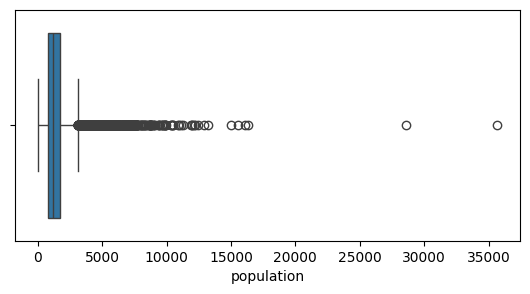

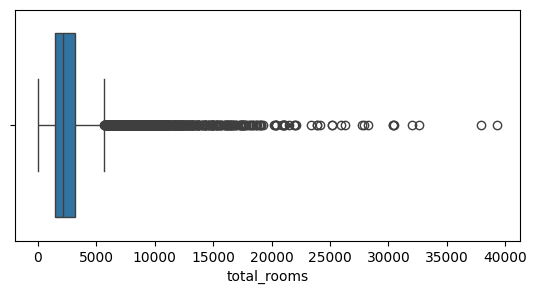

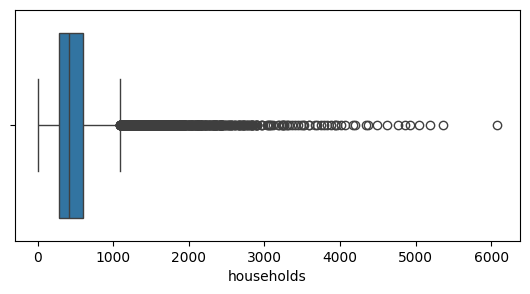

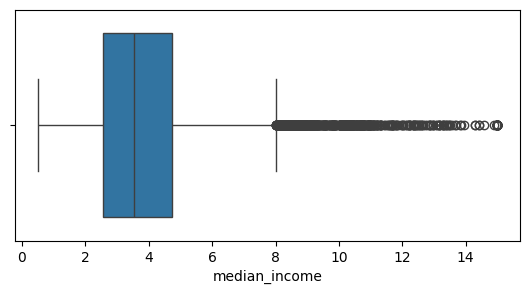

In [10]:
plt.figure(figsize=(30,3))
plt.subplot(1,4,1)
sns.boxplot(data=df, x='population')
plt.show()

plt.figure(figsize=(30,3))
plt.subplot(1,4,2)
sns.boxplot(data=df, x='total_rooms')
plt.show()

plt.figure(figsize=(30,3))
plt.subplot(1,4,3)
sns.boxplot(data=df, x='households')
plt.show()

plt.figure(figsize=(30,3))
plt.subplot(1,4,4)
sns.boxplot(data=df, x='median_income')
plt.show()

In [11]:
q1 = df['population'].quantile(0.25)
q3 = df['population'].quantile(0.75)
iqr = q3-q1
min_range = q1 - iqr*1.5
max_range = q3 + iqr*1.5

df = df[df['population']<max_range]

In [12]:
q1 = df['total_rooms'].quantile(0.25)
q3 = df['total_rooms'].quantile(0.75)
iqr = q3-q1
min_range = q1 - iqr*1.5
max_range = q3 + iqr*1.5

df = df[df['total_rooms']<max_range]

In [13]:
q1 = df['households'].quantile(0.25)
q3 = df['households'].quantile(0.75)
iqr = q3-q1
min_range = q1 - iqr*1.5
max_range = q3 + iqr*1.5

df = df[df['households']<max_range]

In [14]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000
mean,-119.607144,35.671153,29.858638,2104.495640,431.033608,1155.385068,402.315259,3.834278,204214.078801
std,2.002093,2.151052,12.317239,1031.900074,205.488654,575.700349,190.651478,1.897084,115597.132038
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.810000,33.940000,20.000000,1372.000000,283.000000,747.000000,267.000000,2.536575,116100.000000
50%,-118.550000,34.280000,31.000000,1971.000000,405.000000,1077.000000,379.500000,3.509500,176700.000000
75%,-118.030000,37.730000,38.000000,2741.000000,557.000000,1505.000000,524.000000,4.700000,261400.000000
max,-114.490000,41.950000,52.000000,5202.000000,1373.000000,3131.000000,938.000000,15.000100,500001.000000


In [15]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit_transform(df)

array([[-1.31009283,  1.02689644,  0.90455869, ..., -1.44936085,
         2.36734129,  2.148779  ],
       [-1.31508774,  1.01294939,  1.79764027, ..., -1.18184973,
         1.80446204,  1.27935658],
       [-1.32008265,  1.01294939,  1.79764027, ..., -0.96154646,
         0.95350121,  1.18592611],
       ...,
       [-0.8056069 ,  1.74749373, -1.04398295, ...,  0.16095116,
        -1.12506141, -0.96816527],
       [-0.855556  ,  1.74749373, -0.96279371, ..., -0.27965538,
        -1.03692373, -1.03391264],
       [-0.81559672,  1.71959964, -1.12517218, ...,  0.66974681,
        -0.76207335, -0.99325308]])

In [16]:
x = df[['median_income']]
y = df['median_house_value']

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [19]:
print(lr.score(x_train, y_train)*100)
print(lr.score(x_test, y_test)*100)

48.00660222601745
47.461787086762875


In [20]:
print(lr.coef_)
print(lr.intercept_)

[41903.24263224]
43611.67350635954


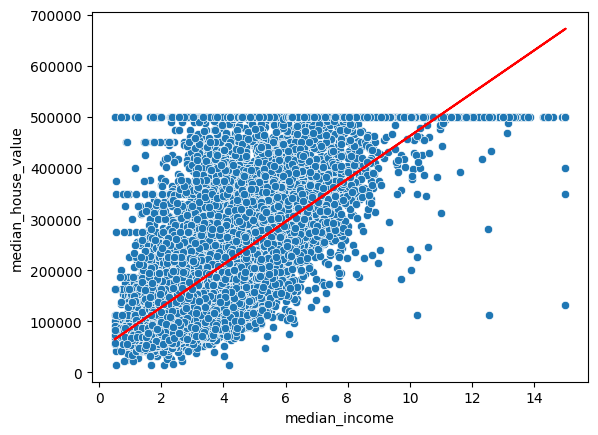

In [21]:
sns.scatterplot(data=df, x='median_income', y='median_house_value')
plt.plot(df['median_income'], lr.predict(x), c='red')
plt.show()

In [22]:
from sklearn.linear_model import Lasso, Ridge

In [23]:
ls = Lasso(alpha=1)
ls.fit(x_train, y_train)

Lasso(alpha=1)

In [24]:
print(ls.score(x_train, y_train)*100)
print(ls.score(x_test, y_test)*100)

48.006602223989944
47.46176685013093


In [25]:
rd = Ridge(alpha=0.1)
rd.fit(x_train, y_train)

Ridge(alpha=0.1)

In [26]:
print(rd.score(x_train, y_train)*100)
print(rd.score(x_test, y_test)*100)

48.00660222585225
47.461781310721726


In [29]:
error = pd.DataFrame({'Regularization' : "coef_",
                     "Linear Regression" : lr.coef_,
                     "Lasso" : ls.coef_,
                     "Ridge" : rd.coef_})

In [30]:
error

,Regularization,Linear Regression,Lasso,Ridge
0,coef_,41903.242632,41902.970314,41903.164901
